In [1]:
import torch 
from torch import nn 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
import numpy as np
from ResNet import ResNet

In [2]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
class Display_samples(object):

    def __init__(self, dataset_path, model_path, dev='cpu'):
        self.dataset_path = dataset_path 
        self.model_path = model_path 
        self.dev = dev

        self.load_model()

    def load_model(self):
        self.model = ResNet().to(self.dev)
        self.model.load_state_dict(torch.load(self.model_path, map_location=self.dev))
        self.model.eval()

    def post_process_image(self, data):
        img = data.clone().clamp(0,255).detach().numpy()
        img = img.transpose(1,2,0).astype('uint8')
        img = Image.fromarray(img)
        return img


    def display(self, num, size_threshold=600):
        to_tensor = transforms.ToTensor()
        to_image = transforms.ToPILImage()

        image_names = os.listdir(self.dataset_path)
        random_sample_idx = torch.randint(low=0, high=len(image_names), size=(num,))


        cols = 2
        rows = int(num // cols)
        fig, axes = plt.subplots(ncols=rows*2, nrows=cols, figsize=(23,(num+1)*2))
        col1ax = axes[0,:]
        col2ax = axes[1,:]

        counter = 0
        for ax1, ax2, idx in zip(col1ax, col2ax, random_sample_idx) : 
            img = Image.open(os.path.join(self.dataset_path, image_names[idx]))
            height, width = img.size

            while height > size_threshold or width > size_threshold : 
                height = int(height //1.5)
                width = int(width // 1.5)


            img = img.resize((height,width))
            img_tensor = to_tensor(img)

            out = self.model.forward(img_tensor.unsqueeze(0).to(self.dev))
            out = self.post_process_image(out[0])

            ax1.imshow(img)
            print('Image name : ', image_names[idx])
            ax1.axis(False)

            ax2.imshow(out)
            ax2.axis(False)

            counter += 1

Image name :  2016-04-18 04:35:34.jpg
Image name :  2015-03-16 01:52:46.jpg
Image name :  2016-12-08 02:41:17.jpg
Image name :  2015-02-01 01:53:53.jpg


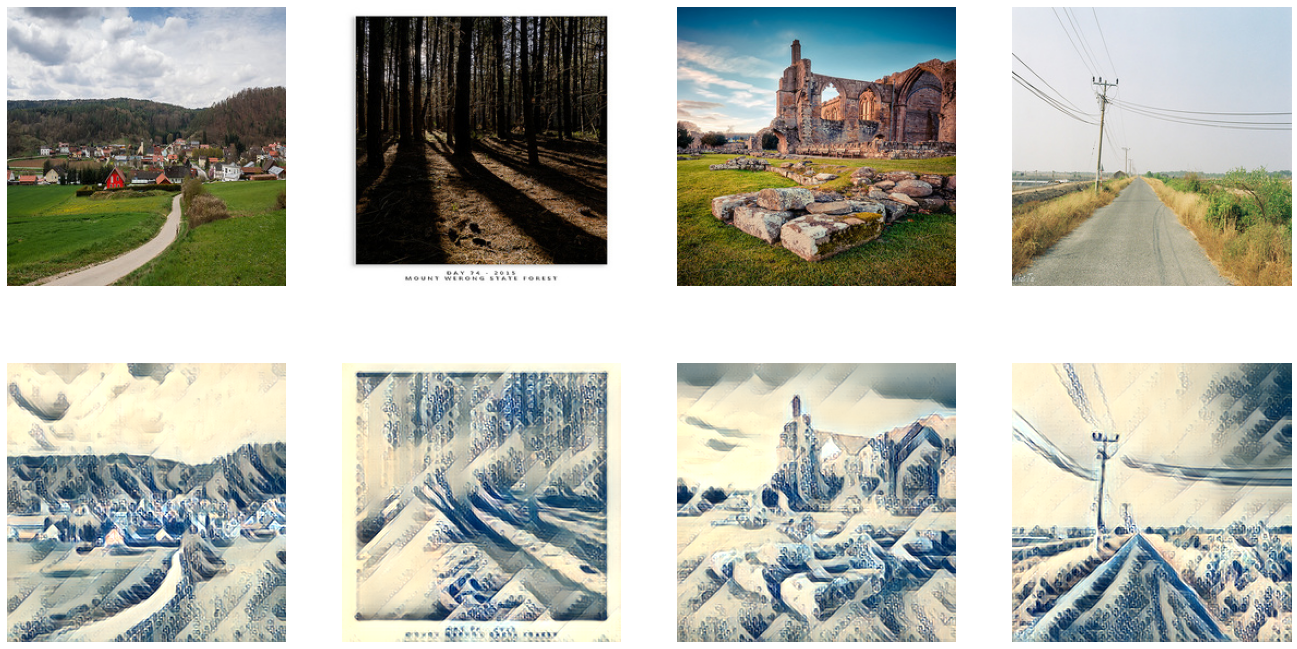

In [4]:
data = '/Users/gursi/desktop/imgs'
model = '/Users/gursi/downloads/model.pt'
display = Display_samples(dataset_path = data, model_path=model)
display.display(5, size_threshold=600)